In [1]:
# importing some libraries
import numpy as np # provides math library
import pandas as pd # data processing library, useful for CSV file reading
import seaborn as sns # useful for data viz
import matplotlib.pyplot as plt # useful for data viz
%matplotlib inline

In [2]:
# importing some more libraries - specific to NN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
# from keras.layers import Dense
# from keras.callbacks import EarlyStopping, ModelCheckpoint # maybe unneeded?
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
# gridsearch is for hyperparameter optimization

In [3]:
# df = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
# x_train are attributes - the images
# y_train are the numerical values associated with them
# train is data for model training
# test is data for eval. model performance
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [7]:
# 10,000 images are made of images that are 28*28 pixels
x_test.shape

(10000, 28, 28)

In [8]:
# 60,000 images are made of images that are 28*28 pixels
x_train.shape

(60000, 28, 28)

data structure = a tensor. tensors have 3 main attributes
1. number of axes (rank): a tensor containing a single number called scalar
array of #s is a vector, array of arrays is a matrix
array of matrices is a tensor

2. shape: tuple of integers describing dimensions the tensor has along each axis

3. data type: indic8s type of data that contains the tensor
can be uint8, float32, float64, etc. in Numpy library this is called dtype

### Time to preprocess our data!

In [9]:
# aka preparing it such that it can be used in a NN training
# what we want to adjust is x values - features used to make predictions
# y is what we try to predict
# 28 * 28 = approx 255
# there are 255 values per pixel
# by dividing we make max value 1
# each color is somewhere between 0 and 256

x_train, x_test = x_train/255, x_test/255

In [10]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [11]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 784) (60000, 10) (10000, 784) (10000, 10)


In [12]:
x_train[0:5, :]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### Building the model

In [14]:
model = tf.keras.models.Sequential([
    
    # 
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    
    # second layer has 128 nodes
    tf.keras.layers.Dense(128, activation='relu'),
    
    # dropout layer helps avoid overfitting
    # 20% of nodes won't be used, bc not every node checks every piece of data 
    # at each training iteration
    tf.keras.layers.Dropout(0.2),
    
    # 10 nodes at the last layer
    tf.keras.layers.Dense(10, activation='softmax')
])

Use sigmoid, relu, and softmax as activation functions = 1 point

In [15]:
# build model
# model = model.Sequential()

# model.add(layers.Dense(256), input_shape = [], 
#           activation = 'relu' #you can use relu, prob use something else
#         )

# model.add(Dropout(0.15))
# model.add(Dense(10))

# make exponential learning rate
INR = (1 * 10^-3)
lr = tf.keras.optimizers.schedules.ExponentialDecay(INR, 
                                               decay_steps = 100000, 
                                               decay_rate = 0.95, 
                                               staircase = False)

# define optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate = lr)

# compile model
model.compile(optimizer = optimizer,
              loss = 'sparse_categorical_crossentropy',
              # categorical loss, we're not performing regression
              
              metrics = ['accuracy'])
              # tells us how to grade how well the model is operating

In [16]:
# epoch: specify how many presentations you give from your data into model
# presents data into network for each epoch and does it 5x
# accuracy increases, loss decreases

e_input = layers.Input(shape=(28,28))
e_1 = layers.Flatten()(e_input)
d_1 = layers.Dense(128, activation='relu')(e_1)
output = layers.Dense(10, activation='softmax')(d_1)

opt = tf.optimizers.Adam()
lss=tf.keras.losses.CategoricalCrossentropy()
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=2, min_delta=0.01)
# early stop stops training if the accuracy isn't more than 2% greater

model = Model(inputs=e_input, outputs=output, name='m')
model.compile(loss=lss,metrics=['accuracy'], optimizer=opt)

In [17]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 649us/step - loss: 1.2094 - accuracy: 0.7014
Epoch 2/10
1875/1875 [==============================] - 1s 638us/step - loss: 0.5055 - accuracy: 0.8690
Epoch 3/10
1875/1875 [==============================] - 1s 635us/step - loss: 0.3891 - accuracy: 0.8934
Epoch 4/10
1875/1875 [==============================] - 1s 635us/step - loss: 0.3443 - accuracy: 0.9028
Epoch 5/10
1875/1875 [==============================] - 1s 635us/step - loss: 0.3200 - accuracy: 0.9085
Epoch 6/10
1875/1875 [==============================] - 1s 650us/step - loss: 0.3036 - accuracy: 0.9125
Epoch 7/10
1875/1875 [==============================] - 1s 646us/step - loss: 0.2902 - accuracy: 0.9166
Epoch 8/10
1875/1875 [==============================] - 1s 644us/step - loss: 0.2792 - accuracy: 0.9190
Epoch 9/10
1875/1875 [==============================] - 1s 639us/step - loss: 0.2693 - accuracy: 0.9217
Epoch 10/10
1875/1875 [==============================] - 1s 636u

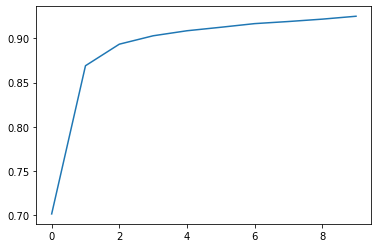

In [18]:
plt.plot(model.history.history['accuracy'])